# Nama : Maezar Abdillah
# NIM : 2109106029
# Kelas : A2 2021

In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Cek Dataset apakah ada yang bernilai null

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Split Data

In [9]:
X = df[["writing_score", "reading_score", "math_score"]]
Y = df["gender"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5) 
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [12]:
# Menghitung score dari KNN
print("Akurasi Score Training :",modelKNN.score(X_train, Y_train))
print("Akurasi Score Testsing :",modelKNN.score(X_test, Y_test))

Akurasi Score Training : 0.89
Akurasi Score Testsing : 0.88


In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier().fit(X_train,Y_train)

In [14]:
# Menghitung score dari Decision Tree
print(f'akurasi train decision tree : {modelDT.score(X_train, Y_train)}')
print(f'akurasi test decision tree : {modelDT.score(X_test, Y_test)}')

akurasi train decision tree : 0.99375
akurasi test decision tree : 0.85


In [15]:
# Visualisasi dari decision tree
from sklearn import tree

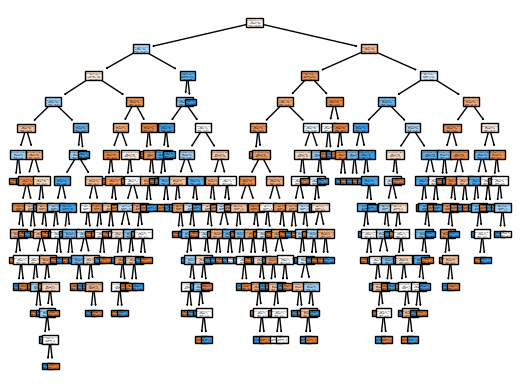

In [16]:
tree.plot_tree(modelDT,
               feature_names=X.columns,
               filled=True,
               class_names=Y.unique())
plt.show()

In [17]:
# Naive Baiyes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [18]:
modelGNB = GaussianNB().fit(X_train, Y_train)

In [20]:
print("Score Training Set dengan Naive Bayes = ", modelGNB.score(X_train, Y_train))
print("Score Testing Set dengan Naive Bayes = ", modelGNB.score(X_test, Y_test))

Score Training Set dengan Naive Bayes =  0.6825
Score Testing Set dengan Naive Bayes =  0.64


In [21]:
# Perbandingan Score akurasi dari ketiga Algoritma diatas
print("---Akurasi Training---")
print("Score Training Set dengan KNN = ", modelKNN.score(X_train, Y_train))
print("Score Training Set dengan Decision Tree = ", modelDT.score(X_train, Y_train))
print("Score Training Set dengan Naive Bayes = ", modelGNB.score(X_train, Y_train))
print("---Akurasi Testing---")
print("Score Testing Set Dengan KNN = ",modelKNN.score(X_test, Y_test))
print("Score Testing Set Dengan Decision Tree = ",modelDT.score(X_test, Y_test))
print("Score Testing Set Dengan Naive Bayes = ",modelGNB.score(X_test, Y_test))

---Akurasi Training---
Score Training Set dengan KNN =  0.89
Score Training Set dengan Decision Tree =  0.99375
Score Training Set dengan Naive Bayes =  0.6825
---Akurasi Testing---
Score Testing Set Dengan KNN =  0.88
Score Testing Set Dengan Decision Tree =  0.85
Score Testing Set Dengan Naive Bayes =  0.64


In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression
x = df[['math_score']]
y = df['reading_score']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

In [27]:
modelLR= LinearRegression().fit(x_train,y_train)
predictLR = modelLR.predict(x_test)

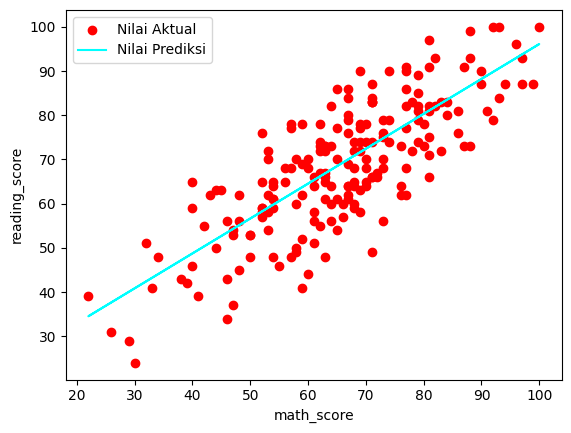

In [32]:
plt.scatter(x_test,y_test,color='red',label = 'Nilai Aktual')
plt.plot(x_test, predictLR, color='aqua',label = 'Nilai Prediksi')
plt.xlabel('math_score')
plt.ylabel('reading_score')
plt.legend()
plt.show()